# 딥러닝을 위한 PyTorch 활용법
## Chapter 2. Linear Regression
- Linear Data
- Linear Model
- y = 2x + 3

In [54]:
import numpy as np
import torch
import torch.nn as nn # Linear 함수
import torch.optim as optim # gradient
import torch.nn.init as init # 초기값
from torch.autograd import Variable # 모델 학습용

In [55]:
# visdom은 페이스북에서 제공하는 시각화 툴이다.

from visdom import Visdom
viz = Visdom()

Exception in user code:
------------------------------------------------------------


Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\util\connection.py", line 83, in create_connection
    raise err
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\util\connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 601, in urlopen
    chunked=chunked)
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 357, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 1239, in request
    self._send_request(met

## Generate Data
- normal -> normal_
- uniform -> uniform_
- 강의와 버젼이 다름

In [56]:
num_data = 1000
num_epoch = 1000

noise = init.normal_(torch.FloatTensor(num_data, 1), std = 1)
x = init.uniform_(torch.FloatTensor(num_data, 1), -10,10)

y = 3*x + 5
y_noise = y + noise

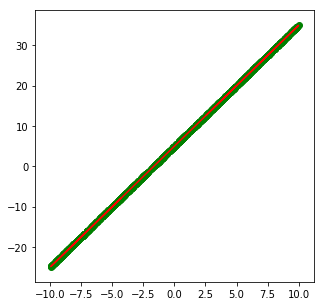

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (5, 5))
plt.plot(x.numpy(), y.numpy(), color = 'r')
plt.scatter(x.numpy(), y.numpy(), color = 'g')

## Model & Optimizer

In [58]:
model = nn.Linear(1,1) # input, output size
output = model(Variable(x)) # 

loss_func = nn.MSELoss() # 이 매트릭(matric)으로 loss를 측정하겠다.
optimizer = optim.SGD(model.parameters(), lr = 0.01) # 해당 optimizer로 업데이트 하겠다.

In [59]:
print(optimizer.zero_grad())

None


In [60]:
list(model.parameters())

[Parameter containing:
 tensor([[0.8377]], requires_grad=True), Parameter containing:
 tensor([-0.5210], requires_grad=True)]

## Train

In [61]:
# train
loss_arr = [] # 일단 보류

label = Variable(y_noise)
# output도 variable로 감싸줘야 함(input과 같이)
# 결과가 Variable로 감싸져서 나옴
for i in range(num_epoch):
    optimizer.zero_grad() # 계산된 gradient를 초기화
    output = model(Variable(x))
    
    loss = loss_func(output, label) # 정답(label)과 계산된 결과(output) 오차값
    loss.backward() # 오차역전파
    optimizer.step() #  해당 optimizer로 가중치값 갱신
    
    if i % 10 == 0:
        print(loss)
        
    loss_arr.append(loss.data.numpy())


tensor(184.3606, grad_fn=<MseLossBackward>)
tensor(21.4096, grad_fn=<MseLossBackward>)
tensor(14.6338, grad_fn=<MseLossBackward>)
tensor(10.1102, grad_fn=<MseLossBackward>)
tensor(7.0902, grad_fn=<MseLossBackward>)
tensor(5.0740, grad_fn=<MseLossBackward>)
tensor(3.7279, grad_fn=<MseLossBackward>)
tensor(2.8293, grad_fn=<MseLossBackward>)
tensor(2.2294, grad_fn=<MseLossBackward>)
tensor(1.8288, grad_fn=<MseLossBackward>)
tensor(1.5614, grad_fn=<MseLossBackward>)
tensor(1.3829, grad_fn=<MseLossBackward>)
tensor(1.2637, grad_fn=<MseLossBackward>)
tensor(1.1841, grad_fn=<MseLossBackward>)
tensor(1.1310, grad_fn=<MseLossBackward>)
tensor(1.0955, grad_fn=<MseLossBackward>)
tensor(1.0719, grad_fn=<MseLossBackward>)
tensor(1.0561, grad_fn=<MseLossBackward>)
tensor(1.0455, grad_fn=<MseLossBackward>)
tensor(1.0385, grad_fn=<MseLossBackward>)
tensor(1.0338, grad_fn=<MseLossBackward>)
tensor(1.0306, grad_fn=<MseLossBackward>)
tensor(1.0285, grad_fn=<MseLossBackward>)
tensor(1.0271, grad_fn=<MseLo

## Check Trained Parameters

In [62]:
param_list = list(model.parameters())
print(param_list[0].data, param_list[1].data) # y = 2x + 3

tensor([[2.9886]]) tensor([5.0068])


## Visualize Loss Graph

Text(0,0.5,'Loss')

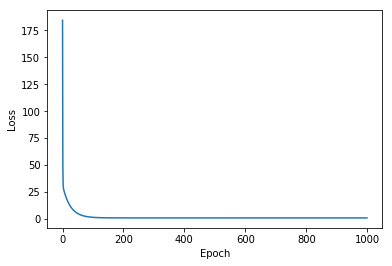

In [63]:
plt.plot(np.arange(len(loss_arr)), loss_arr) # loss값 시각화
plt.xlabel('Epoch')
plt.ylabel('Loss')